In [1]:
from sklearn.decomposition import NMF
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 防止中文显示不出来
plt.rcParams['axes.unicode_minus'] = False  # 防止坐标轴符号显示不出来

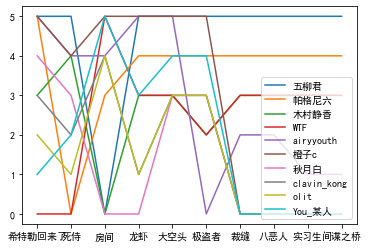

In [2]:
item = [
    '希特勒回来了', '死侍', '房间', '龙虾', '大空头',
    '极盗者', '裁缝', '八恶人', '实习生', '间谍之桥',
]

# 15个用户
user = ['五柳君', '帕格尼六', '木村静香', 'WTF', 'airyyouth',
        '橙子c', '秋月白', 'clavin_kong', 'olit', 'You_某人',
        '凛冬将至', 'Rusty', '噢！你看！', 'Aron', 'ErDong Chen']

RATE_MATRIX = np.array(
    [[5, 5, 3, 0, 5, 5, 4, 3, 2, 1, 4, 1, 3, 4, 5],
     [5, 0, 4, 0, 4, 4, 3, 2, 1, 2, 4, 4, 3, 4, 0],
     [0, 3, 0, 5, 4, 5, 0, 4, 4, 5, 3, 0, 0, 0, 0],
     [5, 4, 3, 3, 5, 5, 0, 1, 1, 3, 4, 5, 0, 2, 4],
     [5, 4, 3, 3, 5, 5, 3, 3, 3, 4, 5, 0, 5, 2, 4],
     [5, 4, 2, 2, 0, 5, 3, 3, 3, 4, 4, 4, 5, 2, 5],
     [5, 4, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0],
     [5, 4, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
     [5, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2],
     [5, 4, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]
)

for i in range(10):
    plt.plot(item, RATE_MATRIX.T[i], label=user[i])
plt.legend(loc=4)
plt.show()

In [3]:
nmf_model = NMF(n_components=2)  # 设有n个主题
item_dis = nmf_model.fit_transform(RATE_MATRIX)
user_dis = nmf_model.components_

In [4]:
item_dis

array([[2.20401687, 1.53852775],
       [1.9083879 , 0.83214869],
       [1.95596132, 0.        ],
       [1.87637018, 1.65573674],
       [2.48959328, 1.41632377],
       [2.38108536, 1.08460665],
       [0.        , 2.29342959],
       [0.        , 2.27353353],
       [0.        , 2.32513876],
       [0.        , 2.23196277]])

In [5]:
item_dis.T

array([[2.20401687, 1.9083879 , 1.95596132, 1.87637018, 2.48959328,
        2.38108536, 0.        , 0.        , 0.        , 0.        ],
       [1.53852775, 0.83214869, 0.        , 1.65573674, 1.41632377,
        1.08460665, 2.29342959, 2.27353353, 2.32513876, 2.23196277]])

In [6]:
user_dis

array([[0.81240799, 0.71153396, 0.47062388, 0.43807017, 1.39456425,
        2.24323719, 1.02417204, 1.25356481, 1.10517661, 1.47624595,
        1.84626347, 0.97437242, 1.14921406, 0.8159644 , 1.14200028],
       [2.23910382, 1.70186882, 1.34300272, 1.09192602, 0.68045441,
        0.        , 0.0542231 , 0.        , 0.        , 0.        ,
        0.04426552, 0.12260418, 0.34109613, 0.51642843, 0.6157604 ]])

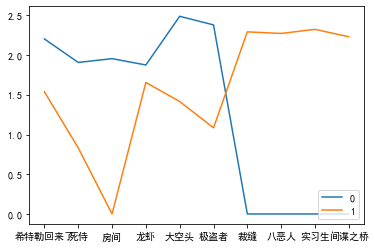

In [7]:
for i in range(2):
    plt.plot(item, item_dis.T[i], label=i)
plt.legend(loc=4)
plt.show()

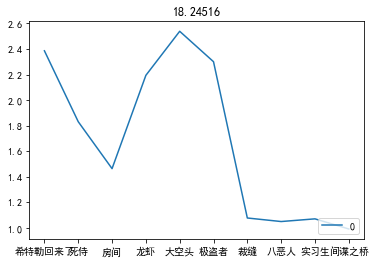

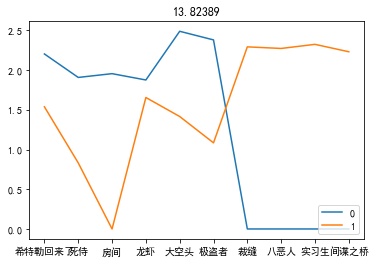

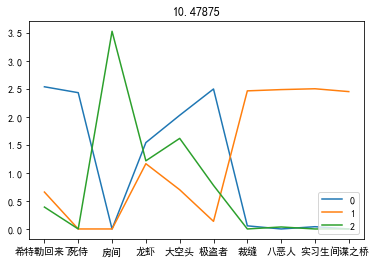

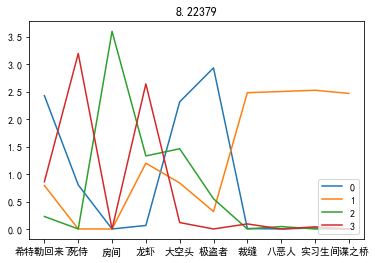

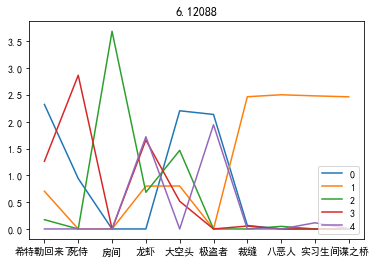

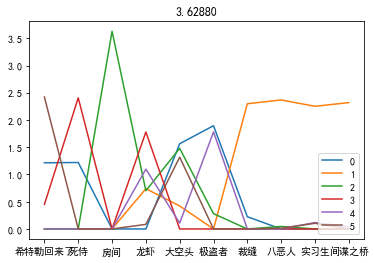

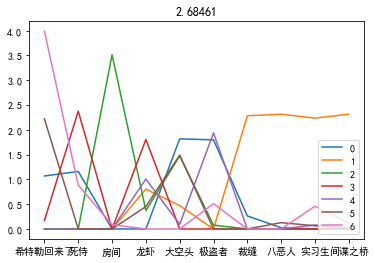

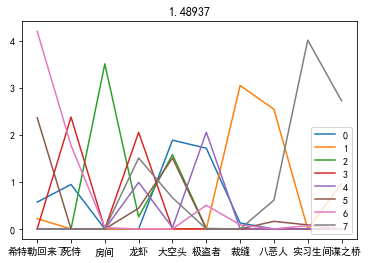

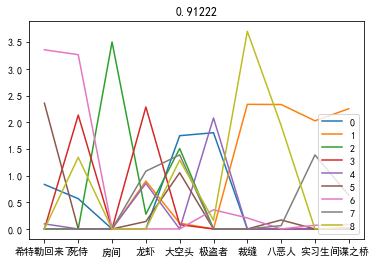

In [8]:
errorlist = []
for j in range(1, 10):
    nmf_model = NMF(n_components=j)  # 设有n个主题
    item_dis = nmf_model.fit_transform(RATE_MATRIX)
    user_dis = nmf_model.components_
    error = nmf_model.reconstruction_err_
    errorlist.append(error)
    for i in range(j):
        plt.plot(item, item_dis.T[i], label=i)
    plt.legend(loc=4)
    plt.title("%.5f" % error)
    plt.show()

In [9]:
errorlist

[18.245162178466455,
 13.823891101850649,
 10.478754611794432,
 8.223787135382622,
 6.120880939704367,
 3.6287950625289254,
 2.6846100993328617,
 1.489365266462274,
 0.91222139787383]

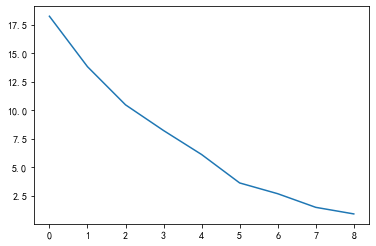

In [10]:
errlen = len(errorlist)
no = []
for i in range(errlen):
    no.append(i)

plt.plot(no, errorlist)
plt.show()